In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
iris = datasets.load_iris()

In [5]:
df_X = pd.DataFrame(iris.data)
df_X.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

In [6]:
df_Y = pd.DataFrame(iris.target)
df_Y.columns = ['class']

In [7]:
df_Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
df = pd.concat([df_X, df_Y], axis=1)

In [9]:
df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [11]:
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.0):
    
    n = x.shape[0]
    
    if sigma is None:
        sigma = 1.0 / n 
    
    xxt = x.dot(x.T)
    
    if kernel == 'polynomial':
        return (C + xxt)**d

In [12]:
K = kernel_matrix(X, kernel='polynomial', sigma=0.2)
print(K.shape)
print(K)

(150, 150)
[[ 70240.512376  57022.169049  55002.062627 ... 143301.984337
  145034.127064 118298.461429]
 [ 57022.169049  46694.890801  44701.078149 ... 121508.031177
  122023.936     99961.946721]
 [ 55002.062627  44701.078149  43095.878216 ... 112748.588191
  114084.125     93082.856768]
 ...
 [143301.984337 121508.031177 112748.588191 ... 577801.395289
  596522.410632 483182.234423]
 [145034.127064 122023.936    114084.125    ... 596522.410632
  623930.478625 501701.826536]
 [118298.461429  99961.946721  93082.856768 ... 483182.234423
  501701.826536 406210.479416]]


In [13]:
n = K.shape[0]
one_mat = np.repeat(1/n, n**2).reshape(n,n)
gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)

eigen_vals, eigen_vecs = np.linalg.eigh(gram)

In [14]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda x: x[0], reverse=True)

In [15]:
print(eigen_pairs[0][0]) # 0 번쨰로 큰 eigen vector 
print(eigen_pairs[0][1]) # 0 번쨰로 큰 eigen values 

15101020.30428868
[ 8.93625867e-02  9.38761869e-02  9.68298401e-02  9.57335822e-02
  9.02780595e-02  7.68073843e-02  9.54639513e-02  8.95906115e-02
  9.98902870e-02  9.26257375e-02  8.26510431e-02  9.07314407e-02
  9.55747826e-02  1.04358502e-01  8.04520318e-02  7.30359451e-02
  8.38607985e-02  8.87873799e-02  7.30248579e-02  8.59420128e-02
  8.06374903e-02  8.57710196e-02  1.00386926e-01  8.37386409e-02
  8.61978521e-02  8.97664732e-02  8.69089816e-02  8.64405952e-02
  8.84326803e-02  9.27992575e-02  9.19419237e-02  8.27643641e-02
  8.44424197e-02  8.05767057e-02  9.20947904e-02  9.46669061e-02
  8.54241522e-02  9.21176933e-02  1.00739263e-01  8.82490874e-02
  9.15917616e-02  1.01535414e-01  1.00100196e-01  8.52740575e-02
  7.85325645e-02  9.45710381e-02  8.49297921e-02  9.66743979e-02
  8.41276072e-02  9.14689377e-02 -5.84738190e-02 -2.92011832e-02
 -6.27089853e-02  2.72464776e-02 -3.12194793e-02  1.67031173e-03
 -3.56477987e-02  5.96243595e-02 -3.34906534e-02  3.29256837e-02
  5.636

In [16]:
kpca = KernelPCA(n_components=3, kernel='poly')
kpca.fit(X)

KernelPCA(kernel='poly', n_components=3)

In [17]:
# sklearn
kpca_eigen_vecs = kpca.alphas_

# mine 
eigen_vecs_mine = np.vstack([eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]]).T

In [18]:
kpca_eigen_vecs.shape

(150, 3)

In [19]:
assert kpca_eigen_vecs.shape == eigen_vecs_mine.shape

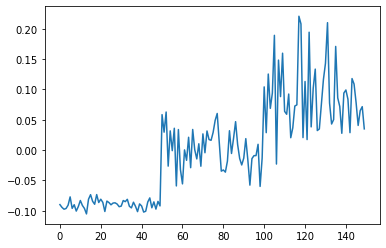

In [20]:
plt.plot(kpca_eigen_vecs[:,0])

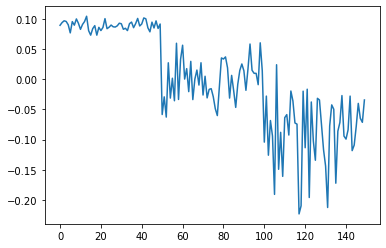

In [21]:
plt.plot(eigen_vecs_mine[:,0])

In [57]:
n_components = 2

transformed_data = []

for j in range(n): 
    loc = np.zeros(n_components)  # 1 by 2 matrix 
    for k in range(n_components): 
        inner_prod_sum = 0
        for i in range(n):
            # eigen_pairs[k][1][i] == i 번째 eigen value 
            inner_prod_sum += eigen_pairs[k][1][i] * gram[j, i]
        loc[k] = inner_prod_sum / np.sqrt(eigen_pairs[k][0])
    transformed_data.append(loc)
    
transformed_data = np.array(transformed_data)

In [59]:
transformed_data

array([[ 3.47263291e+02,  3.61422714e+01],
       [ 3.64803156e+02, -1.17936466e+01],
       [ 3.76281061e+02, -1.34263901e+01],
       [ 3.72021000e+02, -2.66644394e+01],
       [ 3.50820821e+02,  3.49550090e+01],
       [ 2.98473735e+02,  9.04326374e+01],
       [ 3.70973213e+02, -9.33141978e+00],
       [ 3.48149396e+02,  2.09143796e+01],
       [ 3.88173968e+02, -4.97523448e+01],
       [ 3.59943906e+02, -5.28402316e+00],
       [ 3.21182212e+02,  7.68999135e+01],
       [ 3.52582662e+02,  5.26136060e+00],
       [ 3.71403904e+02, -1.80026768e+01],
       [ 4.05537466e+02, -4.93068803e+01],
       [ 3.12636847e+02,  1.42335318e+02],
       [ 2.83817911e+02,  1.66240117e+02],
       [ 3.25883325e+02,  9.16215577e+01],
       [ 3.45028036e+02,  3.53619032e+01],
       [ 2.83774826e+02,  1.12274402e+02],
       [ 3.33970930e+02,  5.68455972e+01],
       [ 3.13357539e+02,  5.30522620e+01],
       [ 3.33306450e+02,  4.86140482e+01],
       [ 3.90103907e+02,  4.10627120e+00],
       [ 3.

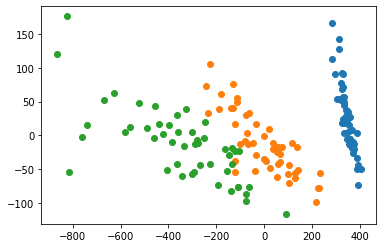

In [58]:
for l in zip(label):
    plt.scatter(transformed_data[y==l, 0], transformed_data[y==l, 1], label=l)